In [8]:
#Import libraries
import nltk
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
import numpy as np
import networkx as nx
from gensim.summarization import keywords
from string import punctuation
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
import pandas as pd

In [9]:
#Import text file
file = open("C:/Users/hp/Desktop/therapy.txt", "r",encoding="utf8")

#Splitting into sentences 
filedata = file.readlines()
article = filedata[0].split(". ")
sentences = []

print(filedata)

['Therapy is conversation with a purpose. The purpose is to discover and change the psycho-behavioral structures, processes, and habits that maintain the client’s problem. But how may conversation accomplish these ends? Therapists use language in several common ways: to explain the rationale for a given intervention (e.g., how exposure works); to instruct the client in practicing a new behavioral or social skill (“look me in the eye and shake my hand firmly”); to direct the client’s attention to a certain aspect of their experience (“what are you feeling right now?”); to prompt them to share information (“tell me more about your relations with your mother”); and to reflect the client’s concerns (“so, what I hear you saying is that your boyfriend’s drinking is upsetting you”) so as to convey empathy and attention, and so on. But all these uses are general strategies of communication, deployed in multiple contexts beside therapy. They do not distinguish the therapy encounter from other s

In [11]:
#Text cleaning
for sentence in article:
    sentences.append(sentence.replace("[^a-zA-Z]", " ").split(" "))
sentences.pop() 
stop_words = stopwords.words('english')
summarize_text = []
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
#Find similarity using cosine similarity 
def sentence_similarity(sent1, sent2, stopwords=None):
    if stopwords is None:
        stopwords = []
 
    sent1 = [w.lower() for w in sent1]
    sent2 = [w.lower() for w in sent2]
 
    all_words = list(set(sent1 + sent2))
 
    vector1 = [0] * len(all_words)
    vector2 = [0] * len(all_words)
 
    #Build the vector for the first sentence
    for w in sent1:
        if w in stopwords:
            continue
        vector1[all_words.index(w)] += 1
 
    #Build the vector for the second sentence
    for w in sent2:
        if w in stopwords:
            continue
        vector2[all_words.index(w)] += 1
 
    return 1 - cosine_distance(vector1, vector2)

In [13]:
#Generate similarity matrix
similarity_matrix = np.zeros((len(sentences), len(sentences)))

for idx1 in range(len(sentences)):
    for idx2 in range(len(sentences)):
        if idx1 == idx2: #ignore if both are same sentences
            continue 
        similarity_matrix[idx1][idx2] = sentence_similarity(sentences[idx1], sentences[idx2], stop_words)
print(similarity_matrix)

[[0.         0.18257419 0.0745356  0.19245009 0.23570226 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.         0.18257419 0.0745356
  0.19245009 0.23570226 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.18257419 0.         0.08164966 0.         0.         0.
  0.08451543 0.08944272 0.         0.         0.         0.
  0.         0.         0.         0.18257419 1.         0.08164966
  0.         0.         0.         0.08451543 0.08944272 0.
  0.         0.         0.         0.         0.         0.        ]
 [0.0745356  0.08164966 0.         0.         0.05270463 0.03131121
  0.06900656 0.10954451 0.03042903 0.         0.         0.
  0.05773503 0.         0.0745356  0.0745356  0.08164966 1.
  0.         0.05270463 0.03131121 0.06900656 0.10954451 0.03042903
  0.         0.         0.         0.05773503 0.         0.0745356 ]
 [0.19245009 0.         0.         0.     

In [14]:
#Rank sentences in similarity martix
sentence_similarity_graph = nx.from_numpy_array(similarity_matrix)
scores = nx.pagerank(sentence_similarity_graph)

In [15]:
#Sort the rank and pick top sentences
ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)    
print("Indexes of top ranked_sentence order are ", ranked_sentence) 
print("\n")
top_n = 2
for i in range(top_n):
    summarize_text.append(" ".join(ranked_sentence[i][1]))


Indexes of top ranked_sentence order are  [(0.041379322279008486, ['But', 'how', 'may', 'conversation', 'accomplish', 'these', 'ends?', 'Therapists', 'use', 'language', 'in', 'several', 'common', 'ways:', 'to', 'explain', 'the', 'rationale', 'for', 'a', 'given', 'intervention', '(e.g.,', 'how', 'exposure', 'works);', 'to', 'instruct', 'the', 'client', 'in', 'practicing', 'a', 'new', 'behavioral', 'or', 'social', 'skill', '(“look', 'me', 'in', 'the', 'eye', 'and', 'shake', 'my', 'hand', 'firmly”);', 'to', 'direct', 'the', 'client’s', 'attention', 'to', 'a', 'certain', 'aspect', 'of', 'their', 'experience', '(“what', 'are', 'you', 'feeling', 'right', 'now?”);', 'to', 'prompt', 'them', 'to', 'share', 'information', '(“tell', 'me', 'more', 'about', 'your', 'relations', 'with', 'your', 'mother”);', 'and', 'to', 'reflect', 'the', 'client’s', 'concerns', '(“so,', 'what', 'I', 'hear', 'you', 'saying', 'is', 'that', 'your', 'boyfriend’s', 'drinking', 'is', 'upsetting', 'you”)', 'so', 'as', 'to'

In [17]:
#Generate keywords without lemmatization
text = str(filedata)

print(keywords(text,words=30,lemmatize=False))

therapy
behavioral
rogers
convey
information
fell
meanings
meaning
conversation
certain
conversations
patient
skill
freud
reik famously
material
therapist
structures
therapists use language
uses
theodor
psychologist
carl
motives
inner
resonance
landscape
reproachful
listening
requires


In [19]:
#Generate keywords with lemmatization
text = str(filedata)
print(keywords(text,words=30,lemmatize=True))

therapy
behavioral
rogers
information
conversations
patient
fell
skill
convey
certain
meaning
freud
reik famously
material
therapist
language
structures
uses
theodor
psychologist
carl
given intervention
deployed
slightest hesitation
general strategies


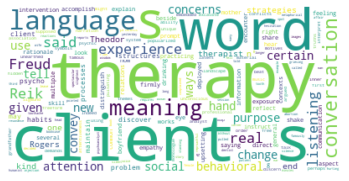

In [18]:
#Generate wordcloud
wordcloud = WordCloud(background_color = "white").generate(text)
#Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
#Output the summarize text
print("Summarize Text: \n", ". ".join(summarize_text))


Summarize Text: 
 But how may conversation accomplish these ends? Therapists use language in several common ways: to explain the rationale for a given intervention (e.g., how exposure works); to instruct the client in practicing a new behavioral or social skill (“look me in the eye and shake my hand firmly”); to direct the client’s attention to a certain aspect of their experience (“what are you feeling right now?”); to prompt them to share information (“tell me more about your relations with your mother”); and to reflect the client’s concerns (“so, what I hear you saying is that your boyfriend’s drinking is upsetting you”) so as to convey empathy and attention, and so on. But how may conversation accomplish these ends? Therapists use language in several common ways: to explain the rationale for a given intervention (e.g., how exposure works); to instruct the client in practicing a new behavioral or social skill (“look me in the eye and shake my hand firmly”); to direct the client’s at